In [1]:
from __future__ import print_function, division
from sklearn.model_selection import train_test_split
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



In [2]:
names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
df = pd.read_csv('dataset/iris/iris.data', names=names)

In [3]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
class           0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


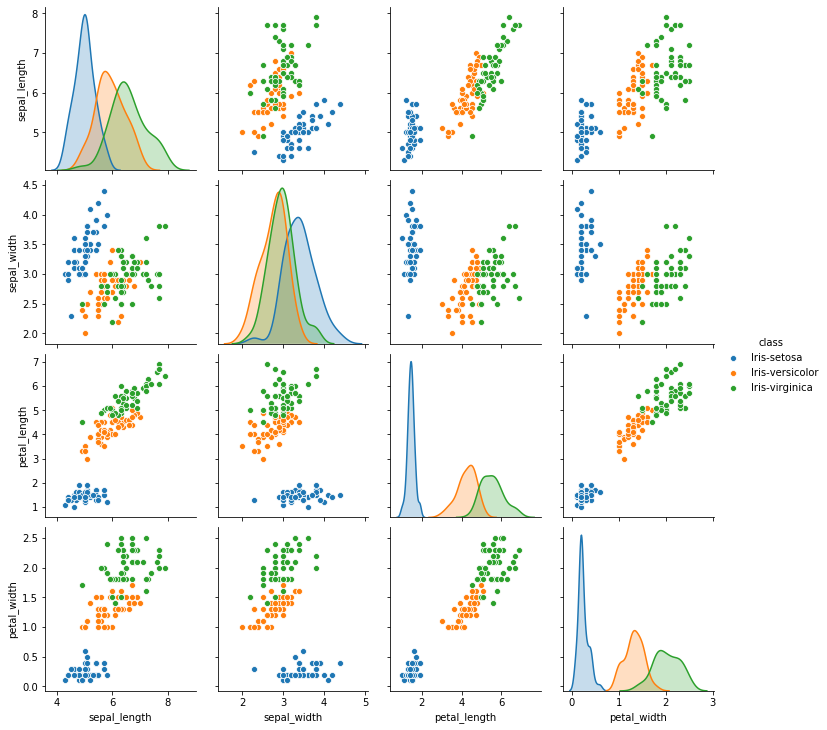

In [5]:
sns.pairplot(df, hue='class')

In [6]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


In [7]:
df['class'] = pd.Categorical(df['class'])
df['class'] = df['class'].cat.codes
#df.drop(columns='class1', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   class         150 non-null    int8   
dtypes: float64(4), int8(1)
memory usage: 5.0 KB


Plot

In [8]:
#put our target df['class'] to df_y
df_y = df.pop('class')

#split our dataframe and dataframe with target
df_train, df_eval, y_train, y_eval = train_test_split(df, df_y, test_size=0.2)


In [9]:
y_train = y_train.astype('int32')
y_eval = y_eval.astype('int32')
y_train.dtypes
y_eval.dtypes

dtype('int32')

In [15]:
def input_fn(features, labels, training=True, batch_size=32,  num_epochs=2):
        # Convert the inputs to a Dataset.
        dataset = tf.data.Dataset.from_tensor_slices((dict(features), labels))

        # Shuffle and repeat if you are in training mode.
        if training:
            dataset = dataset.shuffle(1000).repeat(num_epochs)
    
        return dataset.batch(batch_size)
    


In [21]:
#Make train and test function to pass it to classifire
#

train_fn = lambda: input_fn(df_train, y_train, training=True, num_epochs=10)
eval_fn = lambda: input_fn(df_eval, y_eval, training=False)

In [22]:
#Make features columns, to pass it to classifier
#Tworzymy liste kolumn z opisem dla klasyfikatora

my_feature_columns = []
for feature_name in df_train.keys():
  my_feature_columns.append(tf.feature_column.numeric_column(key = feature_name, dtype=tf.float64))
print(my_feature_columns)

[NumericColumn(key='sepal_length', shape=(1,), default_value=None, dtype=tf.float64, normalizer_fn=None), NumericColumn(key='sepal_width', shape=(1,), default_value=None, dtype=tf.float64, normalizer_fn=None), NumericColumn(key='petal_length', shape=(1,), default_value=None, dtype=tf.float64, normalizer_fn=None), NumericColumn(key='petal_width', shape=(1,), default_value=None, dtype=tf.float64, normalizer_fn=None)]


In [23]:
tf.keras.backend.set_floatx('float64')

linear_est = tf.estimator.LinearClassifier(feature_columns=my_feature_columns, n_classes=3)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmp3sl_siyh', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [24]:
linear_est.train(train_fn)
result = linear_est.evaluate(eval_fn)

#clear_output()  # clears console output
print(result['accuracy'])  # the result variable is simply a dict of stats about our model
print(result)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmp3sl_siyh/model.ckpt.
INFO:tensorflow:loss = 1.0986123, step = 0
INFO:tensorflow:Saving checkpoints for 38 into /tmp/tmp3sl_siyh/model.ckpt.
INFO:tensorflow:Loss for final step: 0.39713037.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-03-30T16:56:39Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmp3sl_siyh/model.ckpt-38
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 0.59682s
INFO:tensorflow:Finished evaluation at 2020-03-30-16:56:40
INFO:tensorflow:Saving dict for global step 38: accuracy = 0.6, average_loss = 0.568101067592